In [1]:
import pandas as pd

In [2]:
train_values_df = pd.read_csv("../data/train_values.csv")
train_labels_df = pd.read_csv("../data/train_labels.csv")

test_values_df = pd.read_csv("../data/test_values.csv")
test_labels_df = pd.read_csv("../data/test_labels.csv")

train_df = train_values_df
train_df["output"] = train_labels_df["x"]

test_df = test_values_df
test_df["output"] = test_labels_df["x"]

data_df = train_df.append(test_df)

C:\Users\mcpip\AppData\Local\Temp\ipykernel_19740\1930176402.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = train_df.append(test_df)


In [3]:
for column in data_df.columns.to_list():
    data_df[column]=data_df[column].astype('category').cat.codes


In [4]:
data_df

,Unnamed: 0,advertis,afford,also,area,avail,bus,can,car,catch,...,take,technolog,toilet,tree,tucson,use,wast,water,will,output
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
4,4,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
20,118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
21,119,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
22,120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid") # 
%matplotlib inline

In [6]:
x_values = data_df[data_df.columns.to_list()[0:-1]]
y_values = data_df["output"]

In [7]:
seed = 4321
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=seed)

In [8]:
def print_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred=y_pred.round())
    sns.heatmap(cm, annot=True)
    target_names = ['0', '1']
    print(classification_report(y_test, y_pred, target_names=target_names))
    print('Accuracy: {0}'.format(accuracy_score(y_test, y_pred)))
    
def plot_aucroc(model, x_test, y_test, md_desc):
    ns_probs = [0 for _ in range(len(y_test))]
    y_pred = model.predict_proba(x_test)[:, 1]
    md_probs = model.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    md_probs = md_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    md_auc = roc_auc_score(y_test, md_probs)
    # summarize scores
    #print('No Skill: ROC AUC = {0:.2f}'.format(ns_auc))
    #print('Logistic: ROC AUC = {0:.2f}'.format(md_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    md_fpr, md_tpr, _ = roc_curve(y_test, md_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color='green')
    plt.plot(md_fpr, md_tpr, label='AUCROC: {1:.2f}'.format(md_desc, md_auc))
    plt.title("AUROC: {0}".format(md_desc))
    plt.xlabel("False positive Rate (1 - specfity)")
    plt.ylabel("True positive rate (sensitivity)")
    plt.legend()
    plt.show()

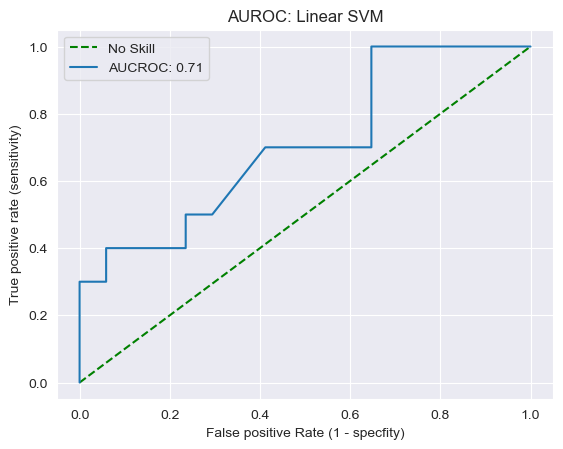

In [9]:
model = SVC(kernel='linear', degree=3, probability=True) # 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plot_aucroc(model, x_test, y_test, md_desc='Linear SVM')

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.65      0.65      0.65        20

    accuracy                           0.62        37
   macro avg       0.62      0.62      0.62        37
weighted avg       0.62      0.62      0.62        37

Accuracy: 0.6216216216216216


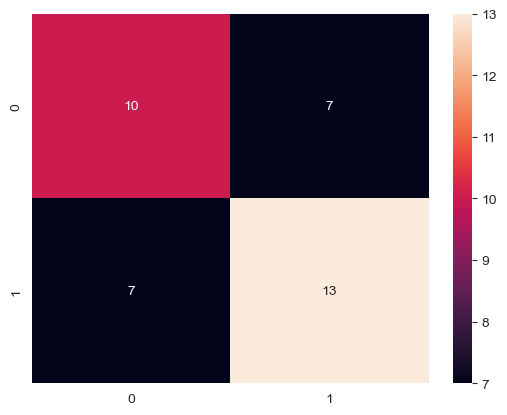

In [10]:
print_metrics(y_test, y_pred)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(20, 4))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return plt

def rmse(a, b):
    a = a.astype(np.float32)
    b = b.astype(np.float32)
    return np.sqrt(np.mean(np.square(a - b)))

def learning_curve01(model, x_train, x_test, y_train, y_test, features):
    training_errors= []
    testing_errors= []

    for i in range(1, len(features) + 1):
        model.fit(x_train[features[0:i]], y_train)
        y = model.predict(x_test[features[0:i]])
        training_errors.append(rmse(model.predict(x_train[features[0:i]]), y_train))
        testing_errors.append(rmse(model.predict(x_test[features[0:i]]), y_test))
    return [training_errors, testing_errors]

def plot_curve01(training_errors, test_errors):
    plt.figure(figsize=(20, 4))
    plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, color= 'blue', label="Training")
    plt.plot(test_errors, 'x-', mfc="none", mec="g", ms=10, color= 'green', label="Test")
    plt.legend()
    plt.xlabel("Polinomial Complexity(x)")
    plt.ylabel("RMSE (y)")
    plt.show()

In [12]:
train_error, test_error = learning_curve01(model, x_train, x_test, y_train, y_test, x_train.columns.to_list())

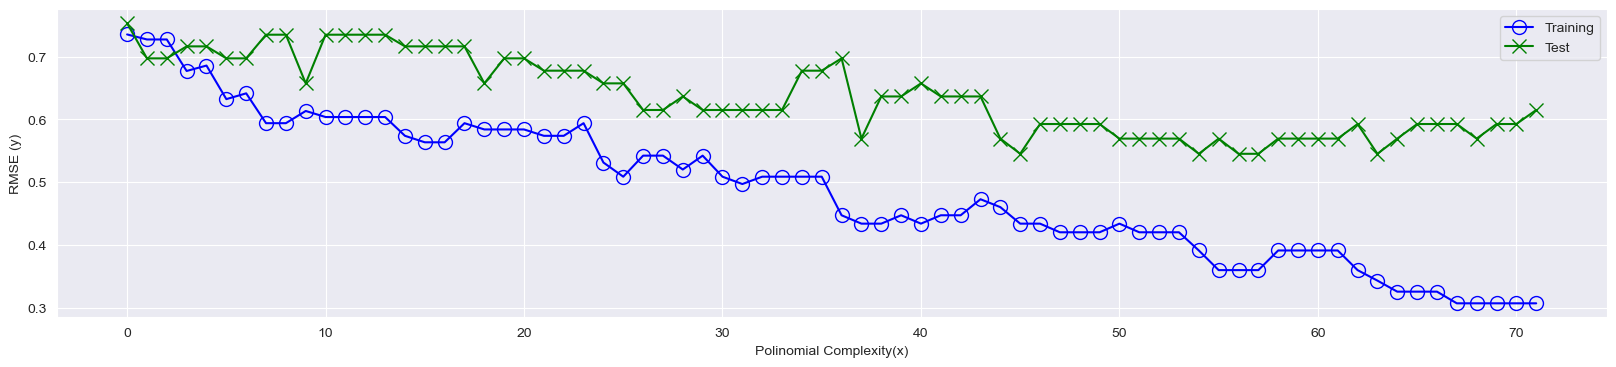

In [13]:
plot_curve01(train_error, test_error)

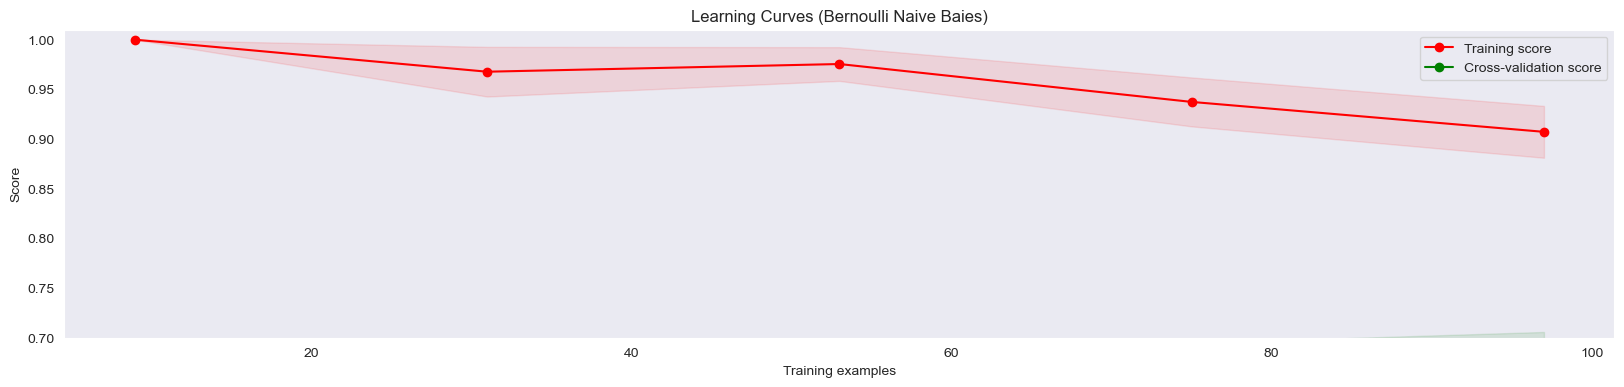

In [14]:
title = r"Learning Curves (Bernoulli Naive Baies)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model, title, x_values, y_values, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()